In [3]:
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from pathlib import Path
from definitions import PROJECT_ROOT


In [10]:



algo1 = SNeD(None)
algo2 = Chalmers96(None, neighbour_set_size=1, sample_set_size=1, use_knnd=False)

datasets = ['rna N3k']
    # , 'rna N3k', 'airfoil']

algos = {algo1: 'Sned', algo2: 'basic 96'}
metric_collection = { "Average speed": 1, "Stress": 2}

experiment = SimpleComparison(algos, experiment_name='test experiment',metric_collection_during_layout_creation=metric_collection,
                             dataset_names=datasets, num_repeats=2, iterations=3)



In [11]:
experiment.run()

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS - Sned" algorithm
####################
The HD distance measure used is: euclidean
####################
"Stress" will be measured every 2 iterations
####################
All stress calculations will be performed using the euclidian norm
####################
 "N-tet" size: 4

 Vectorised euclidean stress 


 Vectorised euclidean stress 


 Vectorised euclidean stress 

####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS - Sned" algorithm
####################
The HD distance measure used is: euclidean
####################
"Stress" will be measured every 2 iterations
####################
All stress calcula

In [12]:
path =  experiment.pickle(save_to=PROJECT_ROOT.joinpath(Path("experiments/sned_vs_96/out")))

{'rna N3k': {'Sned': {'time': [7.739458099999865, 7.688077599999815], 'final stress': [70.48700466256334, 70.01776038022366], 'peak memory': [7344004399, 7344004053], 'baseline memory': [3335, 2989], 'final squad stress': [0, 0]}, 'basic 96': {'time': [7.421588299999712, 7.4055836999996245], 'final stress': [0.6471027659305777, 0.754675509682655], 'peak memory': [7347390372, 7346855256], 'baseline memory': [3341181, 2806120]}}}
{'Stress': ([0, 2, 3], [70.17508963928206, 70.01776038022366, 70.01776038022366]), 'Average quartet stress': ([], [])}
{'Stress': ([0, 2, 3], [73.04034058797704, 1.1833729828456256, 0.754675509682655]), 'Average speed': ([0, 1, 2, 3], [12.623686019805056, 14.270055082057675, 14.956270986037122, 12.445878211454962])}


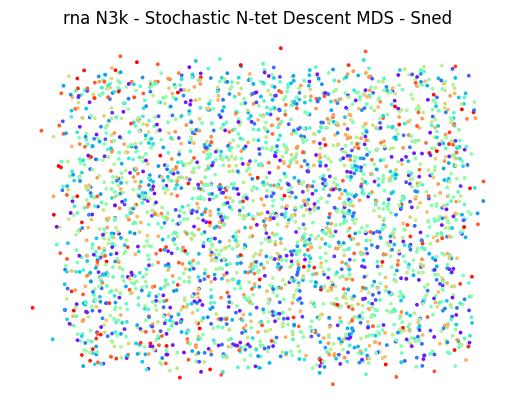

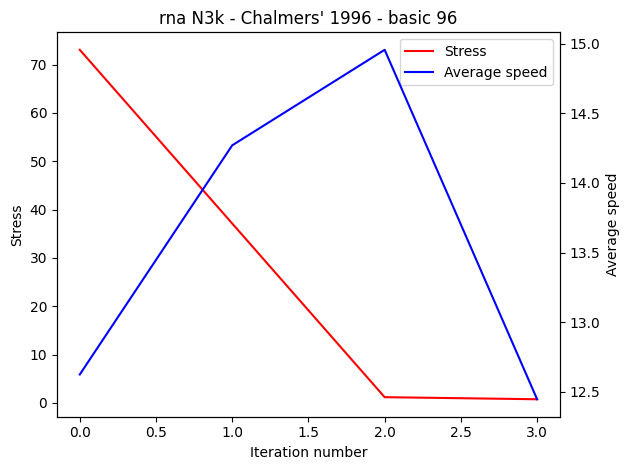

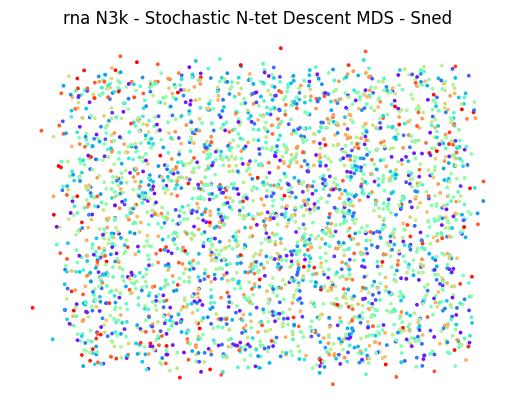

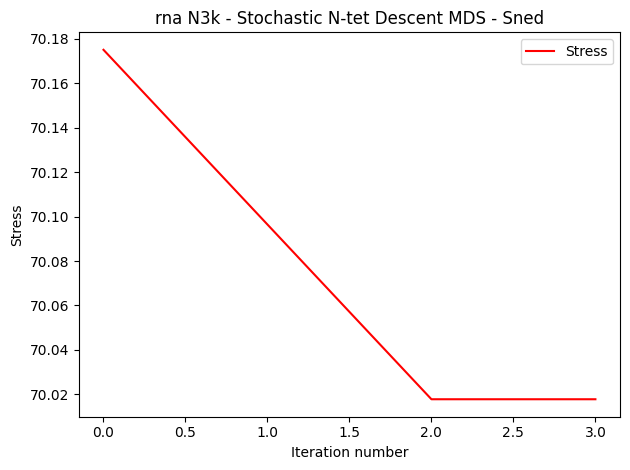

{'Stress': ([0, 2, 3], [70.17508963928206, 70.01776038022366, 70.01776038022366]), 'Average quartet stress': ([], [])}


In [14]:
import pickle


with open(path, 'rb') as file:
     experiment = pickle.load(file)
     file.close()

print(experiment.results)

print(experiment.layouts['rna N3k']['Sned'][-1].collected_metrics)
print(experiment.layouts['rna N3k']['basic 96'][-1].collected_metrics)
show_layouts(experiment.layouts['rna N3k']['Sned'][-1], use_labels=True)
show_generation_metrics(experiment.layouts['rna N3k']['basic 96'][-1], average_speed=True, stress=True)

show_layouts(experiment.layouts['rna N3k']['Sned'][-1], use_labels=True,)
show_generation_metrics(experiment.layouts['rna N3k']['Sned'][-1], stress=True)
print(experiment.layouts['rna N3k']['Sned'][-1].collected_metrics)